# Harshith Sanisetty CTR Prediction

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ad_10000records.csv")
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
8242,75.84,31.0,59886.58,207.17,Optional full-range projection,Robertbury,Female,Gabon,2016-02-26 22:46:43,0
339,40.04,28.0,67669.06,199.39,Synchronized user-facing core,Kennedyfurt,Male,United States Virgin Islands,2016-04-18 15:54:33,0
9024,83.71,23.0,13996.50,172.81,Universal transitional Graphical User Interface,Hubbardmouth,Male,China,2016-02-15 16:52:04,0
7472,40.47,35.0,25603.93,236.87,Optional multi-state hardware,Wrightburgh,Female,Ukraine,2016-07-18 01:36:37,0
2367,73.89,28.0,71222.40,204.79,Intuitive exuding service-desk,Reyesfurt,Female,American Samoa,2016-02-29 23:56:06,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [5]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
target_counts = df['Clicked on Ad'].value_counts()
target_props = df['Clicked on Ad'].value_counts(normalize=True)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

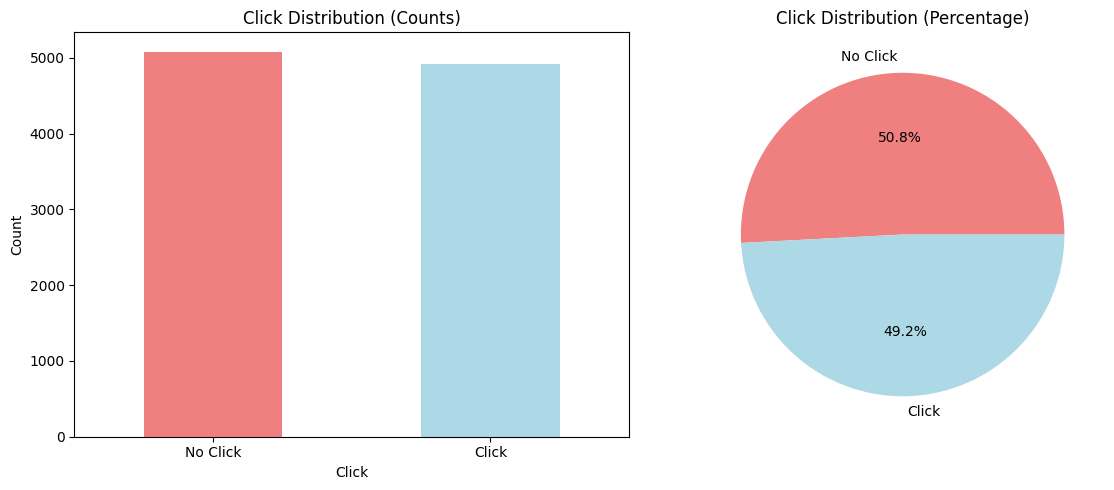

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


target_counts.plot(kind='bar', ax=ax1, color=['lightcoral', 'lightblue'])
ax1.set_title('Click Distribution (Counts)')
ax1.set_xlabel('Click')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['No Click', 'Click'], rotation=0)
ax2.pie(target_counts.values, labels=['No Click', 'Click'], autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue'])
ax2.set_title('Click Distribution (Percentage)')

plt.tight_layout()
plt.show()

the dataset clearly shows that both output classes are equally balanced

C:\Users\harsh\AppData\Local\Temp\ipykernel_13504\1570802180.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_click_rate = df.groupby(pd.cut(df['Age'], bins=10))['Clicked on Ad'].mean()


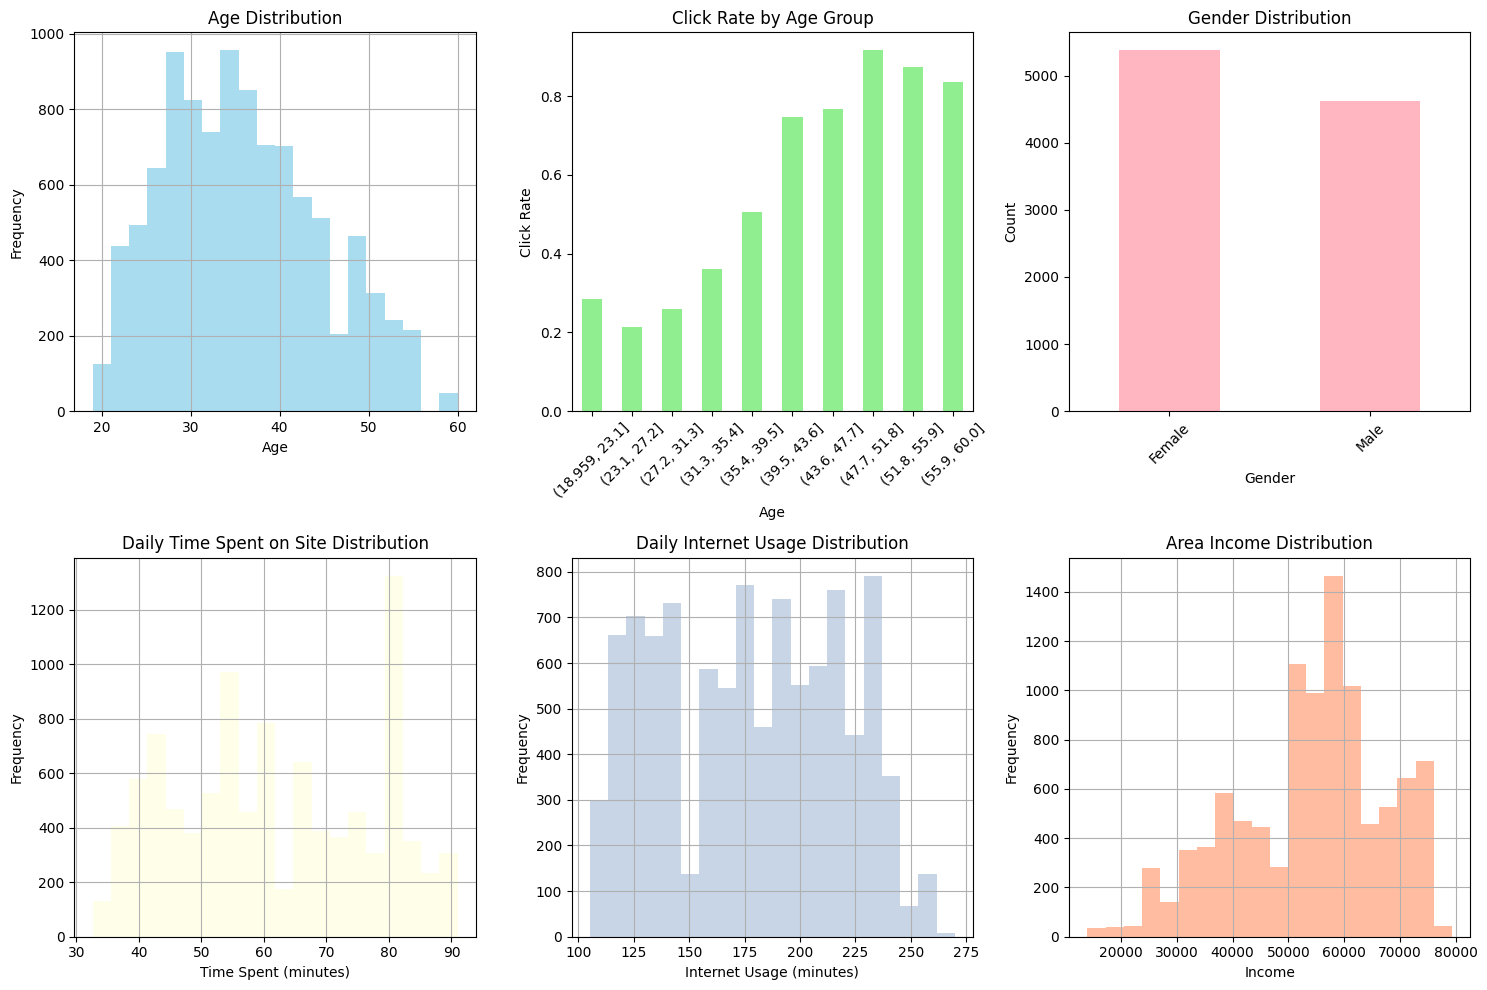

In [8]:
plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
df['Age'].hist(bins=20, alpha=0.7, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.subplot(2, 3, 2)
age_click_rate = df.groupby(pd.cut(df['Age'], bins=10))['Clicked on Ad'].mean()
age_click_rate.plot(kind='bar', color='lightgreen')
plt.title('Click Rate by Age Group')
plt.ylabel('Click Rate')
plt.xticks(rotation=45)


plt.subplot(2, 3, 3)
df['Gender'].value_counts().plot(kind='bar', color='lightpink')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.subplot(2, 3, 4)
df['Daily Time Spent on Site'].hist(bins=20, alpha=0.7, color='lightyellow')
plt.title('Daily Time Spent on Site Distribution')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')


plt.subplot(2, 3, 5)
df['Daily Internet Usage'].hist(bins=20, alpha=0.7, color='lightsteelblue')
plt.title('Daily Internet Usage Distribution')
plt.xlabel('Internet Usage (minutes)')
plt.ylabel('Frequency')


plt.subplot(2, 3, 6)
df['Area Income'].hist(bins=20, alpha=0.7, color='lightsalmon')
plt.title('Area Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()





basic overview of distribution of each feature , age and area income features are observed to have to have a good normal distribution 


 CORRELATION MATRIX:


<Figure size 1000x1000 with 0 Axes>

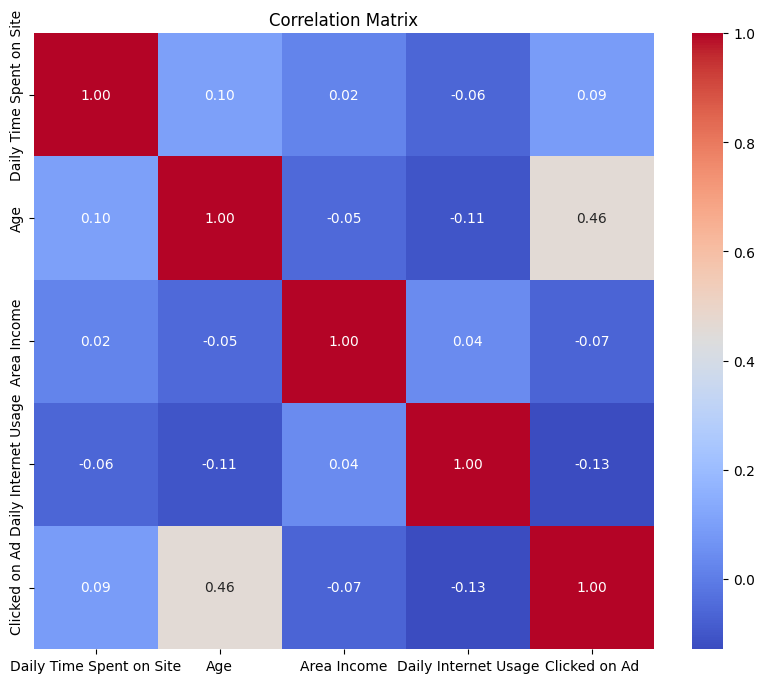

In [9]:
plt.figure(figsize=(10,10))


print("\n CORRELATION MATRIX:")
corr_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()




age feature clearly has better correlation with target variable comapred to others, also no two features have high corrleation features (if they posses then pca could be used to reduce a feature )

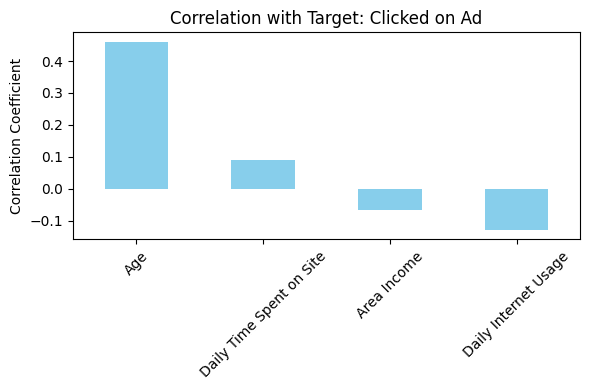

In [10]:

target_corr = df.corr(numeric_only=True)['Clicked on Ad'].drop('Clicked on Ad')

plt.figure(figsize=(6, 4))
target_corr.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Correlation with Target: Clicked on Ad')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


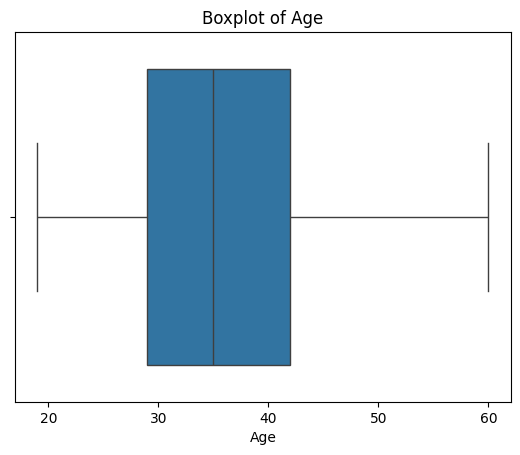

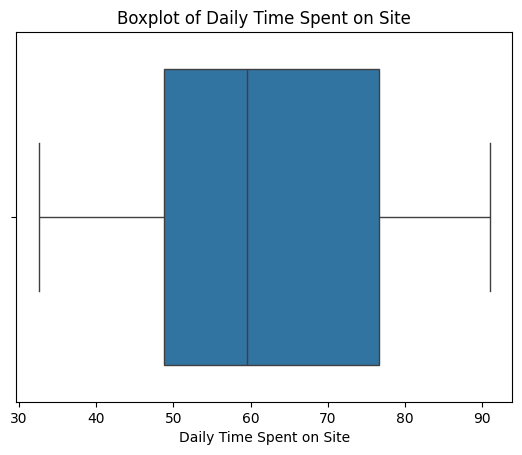

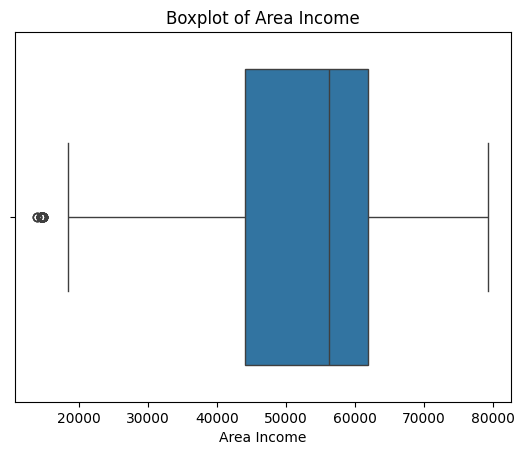

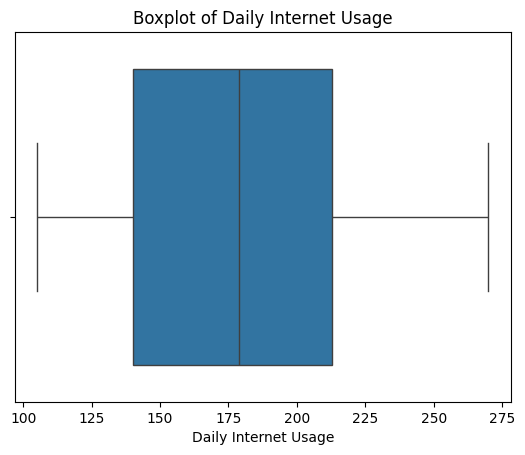

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
li = ['Age','Daily Time Spent on Site','Area Income','Daily Internet Usage']
for i in li:
    sns.boxplot(x=df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()

no potential outliers is obeserved here , only a few is observed for area income(less than Q1 25 percentile) and no signficant need to remove those .

In [12]:
len(df["Ad Topic Line"].unique().tolist())

559

clearly too many unqiue samples , Models will not capture the underlying patterns if many unqiue values are present while Encoding( One Hot Encoding)

so i have used langchain with gemini api so that these unique values gets mapped into their superclasses(ex: if a ad topic line :" cbse students improve their percentages in in physics" , new label gets assigned to the field of : "Education") , resulting reduced number of unique values , which is helpful at encoding , i have choose the limit of 15 categories(1 to assign unknown)

In [13]:
import pandas as pd
import json
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
import os

def categorize_unique_topics(df: pd.DataFrame) -> dict:
  
  

    

    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", google_api_key=os.getenv("GEMINI_API_KEY"), temperature=0.2)
    print(" Model initialized.")

   
    unique_topics = df['Ad Topic Line'].unique().tolist()

    prompt_template = """
    You are an expert marketing analyst. Your task is to analyze the following "LIST OF HEADLINES" and group them into exactly 10 high-level, meaningful categories.

    INSTRUCTIONS:
    1.  Analyze the List: Review all the headlines provided.
   
    3.  Assign Topics:to among these ad_categories = ['Infrastructure', 'Other', 'Generational Technology', 'Business Performance', 'Human Resources', 'Software & Applications', 'Organizational Structure', 'Process Improvement', 'Data Analysis & Prediction', 'Quality Assurance', 'Customer Service', 'Security', 'Project Management', 'Hardware']

    OUTPUT FORMAT:
    Your output MUST be a single, valid JSON object where the keys are the original headlines and the values are the new category names.
    Example: {{"headline_1": "Category_A", "headline_2": "Category_B", ...}}

    LIST OF HEADLINES TO CLASSIFY:
    {unique_headline_list}
    """

    prompt = ChatPromptTemplate.from_template(prompt_template)
    chain = prompt | llm | StrOutputParser()

   
   

    try:
        response = chain.invoke({
            "unique_headline_list": json.dumps(unique_topics)
        })

        cleaned_response = response.strip().replace("```json", "").replace("```", "")
        category_map = json.loads(cleaned_response)

        print(" Successfully received and parsed categories")
        return category_map

    except Exception as e:
        print(f"An error occurred: {e}")
        return {}

In [14]:

ad_topic_map = categorize_unique_topics(df)


if ad_topic_map:
    df['Ad_Category'] = df['Ad Topic Line'].map(ad_topic_map)

    
    df['Ad_Category'].fillna('Other', inplace=True)

    

   
   
    print(df['Ad_Category'].value_counts())

    print("\nSample of the new column:")
    print(df[['Ad Topic Line', 'Ad_Category']].head())

else:
    print("\n Could not generate categories. Please check the errors above.")

 Model initialized.
 Successfully received and parsed categories
Ad_Category
Software & Applications       1704
Other                         1661
Business Performance          1191
Security                       924
Data Analysis & Prediction     640
Process Improvement            571
Hardware                       569
Organizational Structure       535
Project Management             518
Generational Technology        472
Infrastructure                 450
Customer Service               371
Quality Assurance              220
Human Resources                174
Name: count, dtype: int64

Sample of the new column:
                         Ad Topic Line              Ad_Category
0      Decentralized real-time circuit                 Hardware
1       Optional full-range projection                 Hardware
2  Total 5thgeneration standardization  Generational Technology
3          Balanced empowering success     Business Performance
4  Total 5thgeneration standardization  Generational Technol

C:\Users\harsh\AppData\Local\Temp\ipykernel_13504\3115149817.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ad_Category'].fillna('Other', inplace=True)


In [15]:
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Ad_Category
7999,80.47,45.0,74903.41,137.24,Enhanced homogeneous moderator,North Daniel,Male,Bosnia and Herzegovina,2016-03-05 12:03:41,1,Organizational Structure
6279,54.47,32.0,55424.24,172.83,Focused upward-trending core,Lisafort,Male,Lebanon,2016-04-28 22:54:37,0,Business Performance
3717,86.06,29.0,53431.35,141.58,Diverse leadingedge website,Williamsport,Male,Liechtenstein,2016-07-14 22:43:29,1,Software & Applications
9482,83.71,26.0,46033.73,228.78,Front-line zero-defect array,Port Kathleenfort,Male,American Samoa,2016-06-10 03:56:41,0,Quality Assurance
8596,55.60,35.0,65756.36,195.31,Optional multi-state hardware,Williamsport,Female,Saint Vincent and the Grenadines,2016-03-18 13:22:35,1,Hardware


In [16]:
df = df.drop(columns = ['Ad Topic Line'])

In [17]:
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Timestamp,Clicked on Ad,Ad_Category
1644,80.47,48.0,62784.85,123.13,Burgessside,Male,Turkey,2016-07-17 01:13:56,1,Security
3995,41.73,42.0,58151.87,199.43,Port Julie,Male,Czech Republic,2016-07-17 13:22:43,1,Software & Applications
7333,81.58,25.0,50671.60,241.03,Lake Rhondaburgh,Male,Austria,2016-02-17 11:15:31,0,Customer Service
6527,53.68,27.0,36884.23,131.29,South Jeanneport,Male,Zimbabwe,2016-03-09 14:57:11,0,Software & Applications
7090,49.21,30.0,40182.84,240.95,Youngfort,Female,Guinea,2016-07-01 01:12:04,1,Business Performance


In [18]:
import pandas as pd


print(" ADDITONAL FEATURE ENGINEERING")



df_fe = df.copy()
print(f"Starting with {df_fe.shape[1]} features")


if 'Age' in df_fe.columns:
    df_fe['age_group'] = pd.cut(df_fe['Age'],
                                  bins=[0, 25, 35, 45, 55, 100],
                                  labels=['18-25', '25-35', '35-45', '45-55', '55+'])
   


if 'Timestamp' in df_fe.columns:
    df_fe['Timestamp'] = pd.to_datetime(df_fe['Timestamp'])
    df_fe['day_of_week'] = df_fe['Timestamp'].dt.day_name() 


    def time_of_day(hour):
        if 5 <= hour < 12: return 'Morning'
        elif 12 <= hour < 17: return 'Afternoon'
        elif 17 <= hour < 21: return 'Evening'
        else: return 'Night'

    df_fe['time_of_day'] = df_fe['Timestamp'].dt.hour.apply(time_of_day)
    print(" Time-based features created.")
 




new_features_count = df_fe.shape[1] - df.shape[1]
print(f" Added {new_features_count} new, high-impact features.")

 ADDITONAL FEATURE ENGINEERING
Starting with 10 features
 Time-based features created.
 Added 3 new, high-impact features.


In [22]:
df = df_fe

In [23]:
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Timestamp,Clicked on Ad,Ad_Category,age_group,day_of_week,time_of_day
1592,55.60,24.0,52252.91,182.20,West Ricardo,Female,Algeria,2016-06-09 17:11:02,1,Quality Assurance,18-25,Thursday,Evening
2673,80.51,41.0,57846.68,187.76,Michaelmouth,Female,Honduras,2016-05-13 11:57:12,1,Software & Applications,35-45,Friday,Morning
7037,74.54,38.0,57868.44,269.96,Bowenview,Female,Western Sahara,2016-07-19 12:05:58,1,Business Performance,35-45,Tuesday,Afternoon
542,59.51,54.0,48867.36,136.64,Roberttown,Female,South Africa,2016-03-31 20:55:22,1,Customer Service,45-55,Thursday,Evening
7539,82.07,43.0,52563.22,121.28,Lake Gerald,Female,Bangladesh,2016-01-15 22:49:45,1,Organizational Structure,35-45,Friday,Night


In [19]:
countries = df["Country"].unique().tolist()
len(countries)

207

In [20]:
cities = df["City"].unique().tolist()
len(cities)

521

even cities are too many , same case as for ad topic line , so i have grouped city + country -> CONTINENT

In [21]:
df.drop(columns = ["City"],inplace = True)
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Timestamp,Clicked on Ad,Ad_Category
6143,56.39,46.0,40468.53,193.29,Female,Belgium,2016-04-04 08:19:54,1,Software & Applications
8479,88.12,38.0,71455.62,230.93,Female,Hungary,2016-04-04 11:39:51,1,Infrastructure
2384,81.22,41.0,57846.68,187.76,Female,Western Sahara,2016-07-13 21:31:14,0,Infrastructure
6867,74.54,48.0,57868.44,156.97,Male,Turkey,2016-02-13 07:53:55,1,Data Analysis & Prediction
6090,60.53,26.0,63363.04,131.68,Female,Angola,2016-06-10 03:56:41,0,Other


In [24]:
import pandas as pd
import pycountry_convert as pc

def add_continent_column(df_input: pd.DataFrame) -> pd.DataFrame:
   
    df = df_input.copy()

    def country_to_continent(country_name):
       
        try :
            country_alpha2 = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
            continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
            continent_name = pc.convert_continent_code_to_continent_name(continent_code)
            return continent_name
        except (KeyError, TypeError):
            return 'Unknown'
        
    df['Continent'] = df['Country'].apply(country_to_continent)
   
    return df



In [25]:
df= add_continent_column(df)
df = df.drop(['Country'], axis=1)

In [26]:
df = df.drop(['Timestamp'], axis=1)

In [27]:
df.drop(['age_group'], axis=1, inplace=True)

KeyError: "['age_group'] not found in axis"

In [28]:
import tensorflow as tf
from tensorflow import keras

Numerical transformation of categorical features and data spiltting for training and testing

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score




X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']


numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)



In [30]:

X_train_processed_dense = X_train_processed.toarray()

print(X_train_processed_dense[:5])


[[ 7.88195488e-01 -5.84425248e-01  4.42448480e-01  7.26420448e-01
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.02413300e-01 -8.18131078e-01  1.50586358e+00  4.45000477e-01
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.25214972e+00  4.67250987e-01 -1.04835784e+00 -3.00713418e-01
   1.000

In [31]:

import pandas as pd
import numpy as np
from time import time


from sklearn.model_selection import RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


from scipy.stats import randint, uniform


print(" DEFINING MODELS AND EXPANDED HYPERPARAMETER GRIDS")



models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    "ExtraTrees": ExtraTreesClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42, n_jobs=-1, verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=False, auto_class_weights='Balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "NeuralNet": MLPClassifier(max_iter=1000, random_state=42)
}


param_grids = {
    "LogisticRegression": {
        'C': uniform(0.1, 100),
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2']
    },
    "RandomForest": {
        'n_estimators': randint(100, 500),
        'max_depth': [10, 20, 30, 40, None],
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 5),
        'max_features': ['sqrt', 'log2', None]
    },
    "ExtraTrees": {
        'n_estimators': randint(100, 500),
        'max_depth': [10, 20, 30, 40, None],
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 5),
        'max_features': ['sqrt', 'log2', None]
    },
    "XGBoost": {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 12),
        'subsample': uniform(0.7, 0.3),
        'colsample_bytree': uniform(0.7, 0.3),
        'gamma': uniform(0, 0.5),
        'reg_alpha': uniform(0, 1),
        'reg_lambda': uniform(0, 1)
    },
    "LightGBM": {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.3),
        'num_leaves': randint(20, 60),
        'max_depth': randint(5, 15),
        'subsample': uniform(0.7, 0.3),
        'colsample_bytree': uniform(0.7, 0.3),
        'reg_alpha': uniform(0, 1),
        'reg_lambda': uniform(0, 1)
    },
    "CatBoost": {
        'iterations': randint(100, 500),
        'learning_rate': uniform(0.01, 0.3),
        'depth': randint(4, 12),
        'l2_leaf_reg': uniform(1, 10),
        'border_count': [32, 64, 128]
    },
    "GradientBoosting": {
        'n_estimators': randint(100, 300),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.7, 0.3)
    },
    "NeuralNet": {
        'hidden_layer_sizes': [(50, 25), (100, 50), (100, 50, 25)],
        'alpha': uniform(0.0001, 0.1),
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'sgd']
    }
}
print(f" Defined {len(models)} models and their expanded hyperparameter search spaces.\n")




print(" STARTING MODEL TRAINING & HYPERPARAMETER TUNING")


results = []

for model_name, model in models.items():
    start_time = time()
    print(f"Tuning {model_name}...")

    
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=50,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        random_state=42,
        verbose=0
    )

   
    random_search.fit(X_train_processed, y_train)

    best_model = random_search.best_estimator_

   
    y_pred = best_model.predict(X_test_processed)

    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    end_time = time()
    duration = end_time - start_time


    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall,
        "Time (s)": duration
    })
    print(f"{model_name} finished in {duration:.2f} seconds. F1-Score: {f1:.4f}\n")




print("BEST MODEL RESULTS")



results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False).reset_index(drop=True)


champion_model = results_df.iloc[0]


print(results_df.to_string())
print("\n" + "="*60)


print(f" Champion Model: {champion_model['Model']}")
print(f"   - F1-Score: {champion_model['F1-Score']:.4f}")
print(f"   - Accuracy: {champion_model['Accuracy']:.4f}")
print("="*60)

 DEFINING MODELS AND EXPANDED HYPERPARAMETER GRIDS
 Defined 8 models and their expanded hyperparameter search spaces.

 STARTING MODEL TRAINING & HYPERPARAMETER TUNING
Tuning LogisticRegression...
LogisticRegression finished in 22.82 seconds. F1-Score: 0.7433

Tuning RandomForest...


KeyboardInterrupt: 

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

print("="*60)
print("🏆 TRAINING AND EVALUATING THE CHAMPION MODEL")
print("="*60)



champion_model = GradientBoostingClassifier(random_state=42)


champion_model.fit(X_train_processed, y_train)
print("✅ Model training complete.")


print(f"Type of champion_model is now: {type(champion_model)}\n")


print("Performance Confirmation on Test Set:")
y_pred = champion_model.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"  - Accuracy: {accuracy:.4f}")
print(f"  - F1-Score: {f1:.4f}\n")

print("Calculating Predicted CTR...")
predicted_probabilities = champion_model.predict_proba(X_test_processed)[:, 1]

results_df = X_test.copy()
results_df['Predicted_Probability'] = predicted_probabilities



🏆 TRAINING AND EVALUATING THE CHAMPION MODEL
✅ Model training complete.
Type of champion_model is now: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>

Performance Confirmation on Test Set:
  - Accuracy: 0.7855
  - F1-Score: 0.7849

Calculating Predicted CTR...
